# The Sparks Foundation using R
## Intership Batch April-2022
### Task-1
### Languase : R
## Title: Exploratery Data Analysis - Retail

In [1]:
# Let's import required libraries for our analysis
library(tidyverse) # metapackage of all tidyverse packages


# Reading CSV file
store_data <- read_csv("../input/retail-superstore/SampleSuperstore.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 9994 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Ship Mode, Segment, Country, City, State, Region, Category, Sub-Cat...
dbl (5): Postal Code, Sales, Quantity, Discount, Profit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Let's get familiar with data 

In [2]:
glimpse(store_data) # structure of data

Rows: 9,994
Columns: 13
$ `Ship Mode`    <chr> "Second Class", "Second Class", "Second Class", "Standa…
$ Segment        <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consu…
$ Country        <chr> "United States", "United States", "United States", "Uni…
$ City           <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderda…
$ State          <chr> "Kentucky", "Kentucky", "California", "Florida", "Flori…
$ `Postal Code`  <dbl> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032,…
$ Region         <chr> "South", "South", "West", "South", "South", "West", "We…
$ Category       <chr> "Furniture", "Furniture", "Office Supplies", "Furniture…
$ `Sub-Category` <chr> "Bookcases", "Chairs", "Labels", "Tables", "Storage", "…
$ Sales          <dbl> 261.9600, 731.9400, 14.6200, 957.5775, 22.3680, 48.8600…
$ Quantity       <dbl> 2, 3, 2, 5, 2, 7, 4, 6, 3, 5, 9, 4, 3, 3, 5, 3, 6, 2, 2…
$ Discount       <dbl> 0.00, 0.00, 0.00, 0.45, 0.20, 0.00, 0.00, 0.20, 0.20, 0…
$ Profit        

Data contains 9994 rows and 13 columns

In [3]:
head(store_data) #to see snapshot of data

Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


# Data Cleaning

### Fixing the column names for better analysis

In [4]:
library(janitor)
store_data <- clean_names(store_data)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Analysis and Visualisation

Q1. How many ship modes and corresponding segments are there?

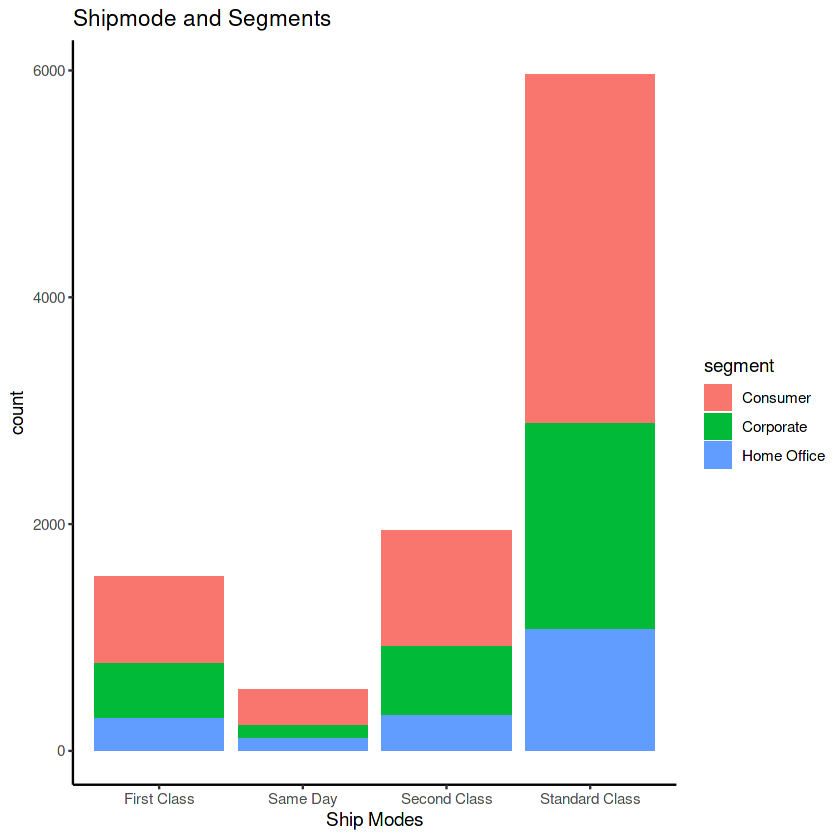

In [5]:
#using ggplot2 to visualize the bar graph
ggplot(store_data) + geom_bar(mapping=aes(x=ship_mode, fill=segment)) + theme_classic() +
labs(title="Shipmode and Segments", x="Ship Modes")


> #### Graph tells that there are 4 types of ship modes and 3 segments.

Q2. Which state has the the most profit?

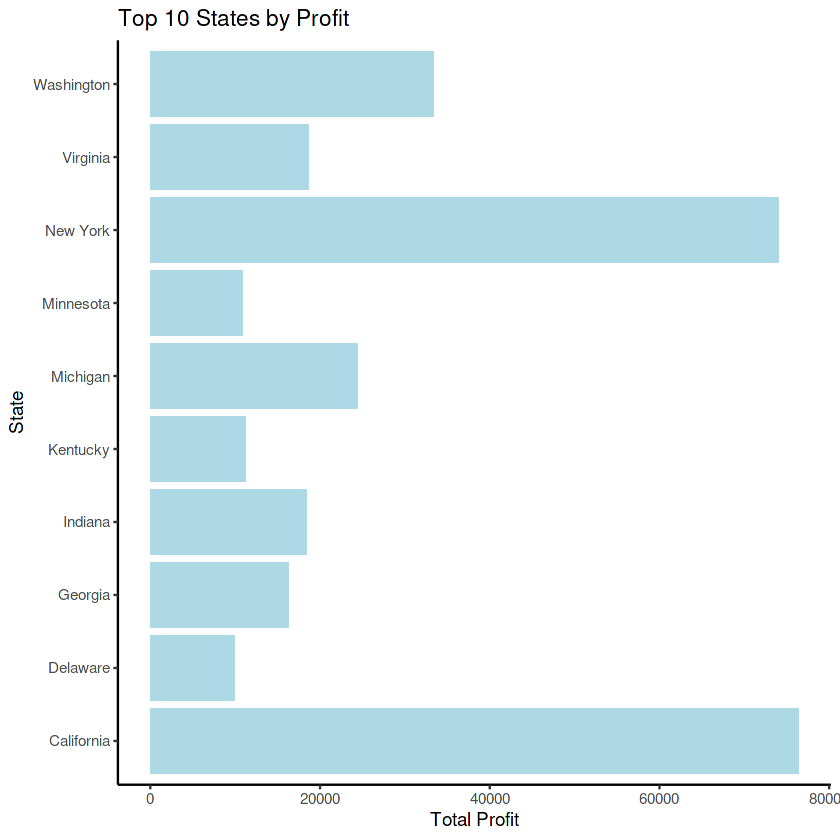

In [6]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(state) %>% summarise(profit=sum(profit)) %>% slice_max(profit,n=10) %>% 
ggplot() + geom_col(mapping=aes(y=state,x=profit), fill="lightblue") + theme_classic() +
labs(title="Top 10 States by Profit", x="Total Profit", y="State")

> #### California and newyork are top states with most profit.

Q3. states who have the the most losses?

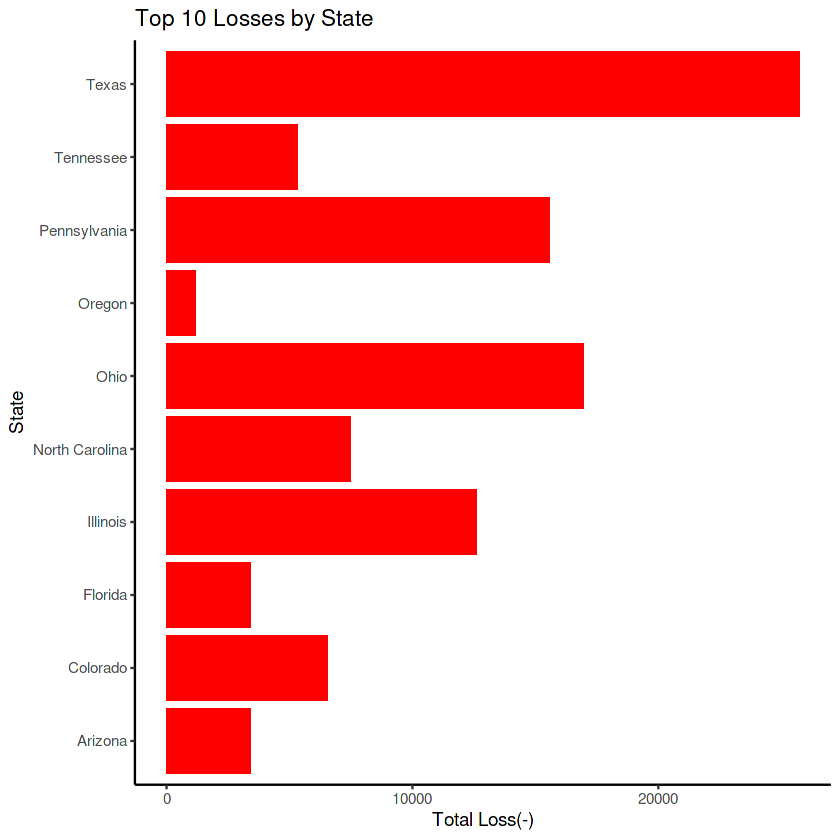

In [7]:
#using ggplot2 to visualize the bar graph
df <- store_data %>% group_by(state) %>% summarise(profit=sum(profit)) %>% slice_min(profit,n=10)
df$profit <- abs(df$profit)
ggplot(df) + geom_col(mapping=aes(y=state,x=profit), fill="RED") + theme_classic() +
labs(title="Top 10 Losses by State", x="Total Loss(-)", y="State")

> #### Orgeon and Florida are top states with most Losses.

**Q4. Top cities with most profit?**

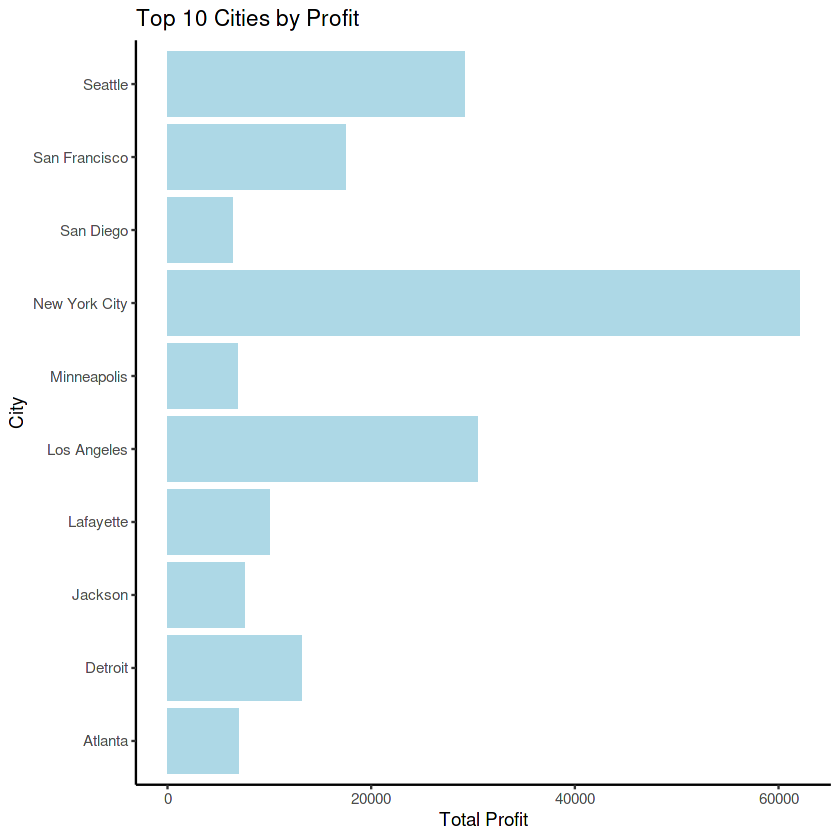

In [8]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(city) %>% summarise(profit=sum(profit)) %>% slice_max(profit,n=10) %>% 
ggplot() + geom_col(mapping=aes(y=city,x=profit), fill="lightblue") + theme_classic() +
labs(title="Top 10 Cities by Profit", x="Total Profit", y="City")

> #### Newyork city has the most profit.

**Q5. Which city has the most losses?**

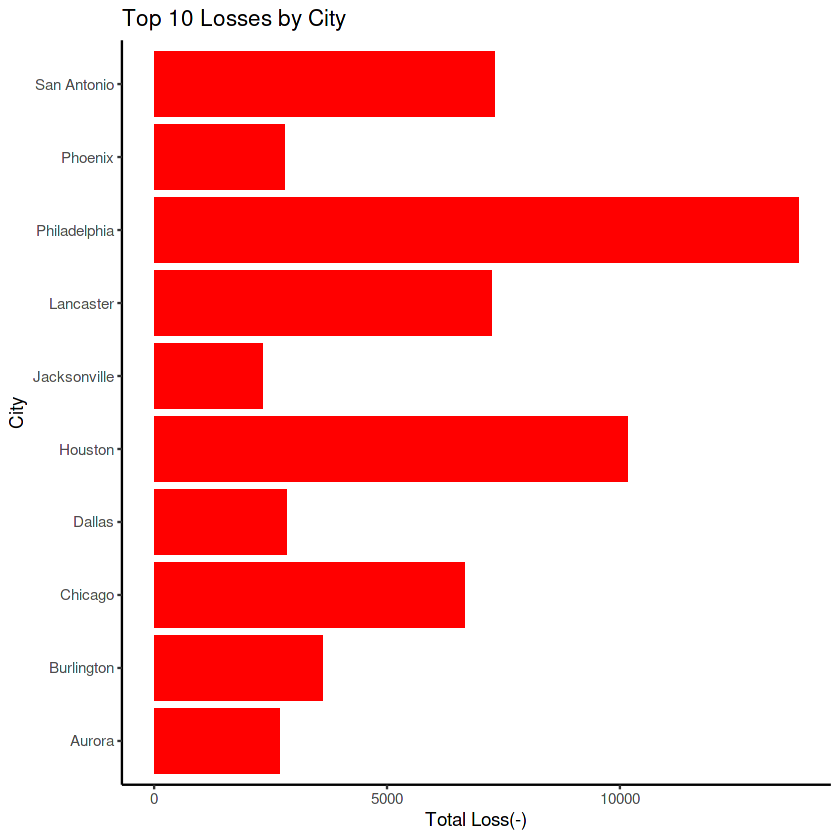

In [9]:
#using ggplot2 to visualize the bar graph
df <- store_data %>% group_by(city) %>% summarise(profit=sum(profit)) %>% slice_min(profit,n=10)
df$profit <- abs(df$profit)
ggplot(df) + geom_col(mapping=aes(y=city,x=profit), fill="RED") + theme_classic() +
labs(title="Top 10 Losses by City", x="Total Loss(-)", y="City")

> #### Philadelphia has the most losses.

**Q6. Which Region has most profit?**

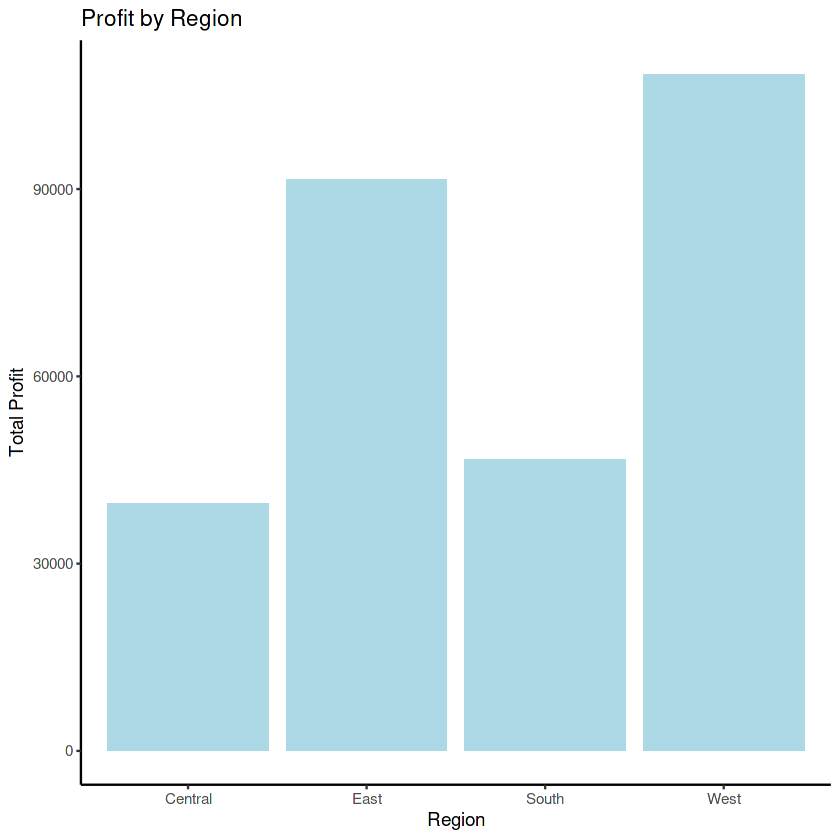

In [10]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(region) %>% summarise(profit=sum(profit)) %>% 
ggplot() + geom_col(mapping=aes(x=region,y=profit), fill="lightblue") + theme_classic() +
labs(title="Profit by Region", y="Total Profit", x="Region")

> #### West has most profit.

**Q7. Which category has the most sales?**

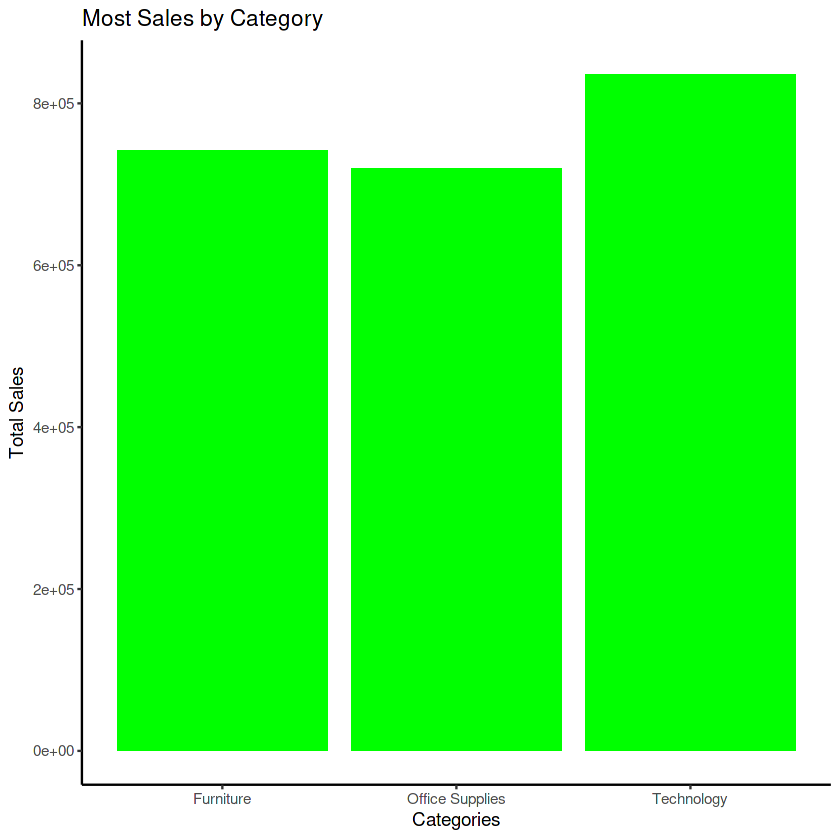

In [11]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(category) %>% summarise(sales=sum(sales)) %>% 
ggplot() + geom_col(mapping=aes(x=category,y=sales), fill="green") + theme_classic() +
labs(title="Most Sales by Category", y="Total Sales", x="Categories")

> #### Technology has the most sales.

**Q8. Which Sub-Categoty has the most and least sales?**

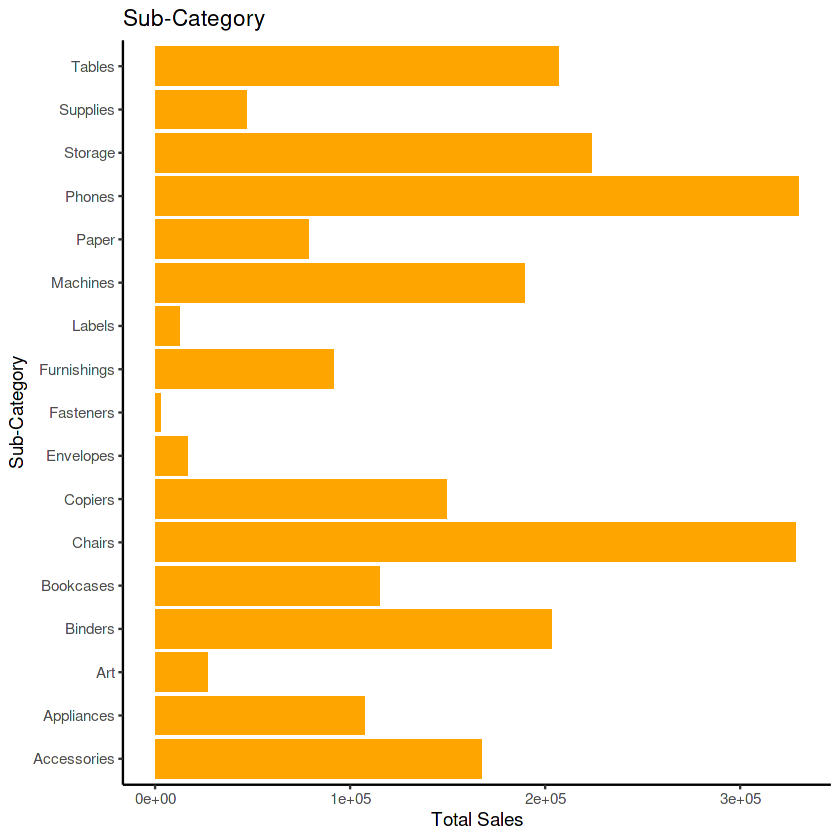

In [12]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(sub_category) %>% summarise(sales=sum(sales)) %>% 
ggplot() + geom_col(mapping=aes(y=sub_category,x=sales), fill="Orange") + theme_classic() +
labs(title="Sub-Category", x="Total Sales", y="Sub-Category")

> #### Phone & Chairs sub-categories have the most sales and Fasteners have the least sales figures.

**Q9. Which Category and Sub-category has been given most and least discounts?**

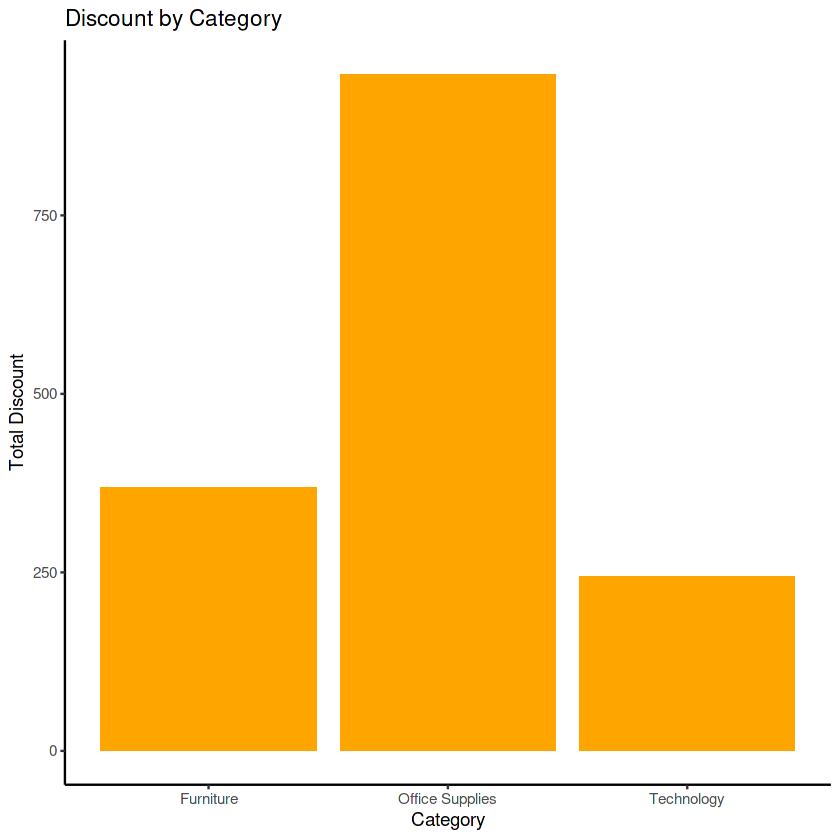

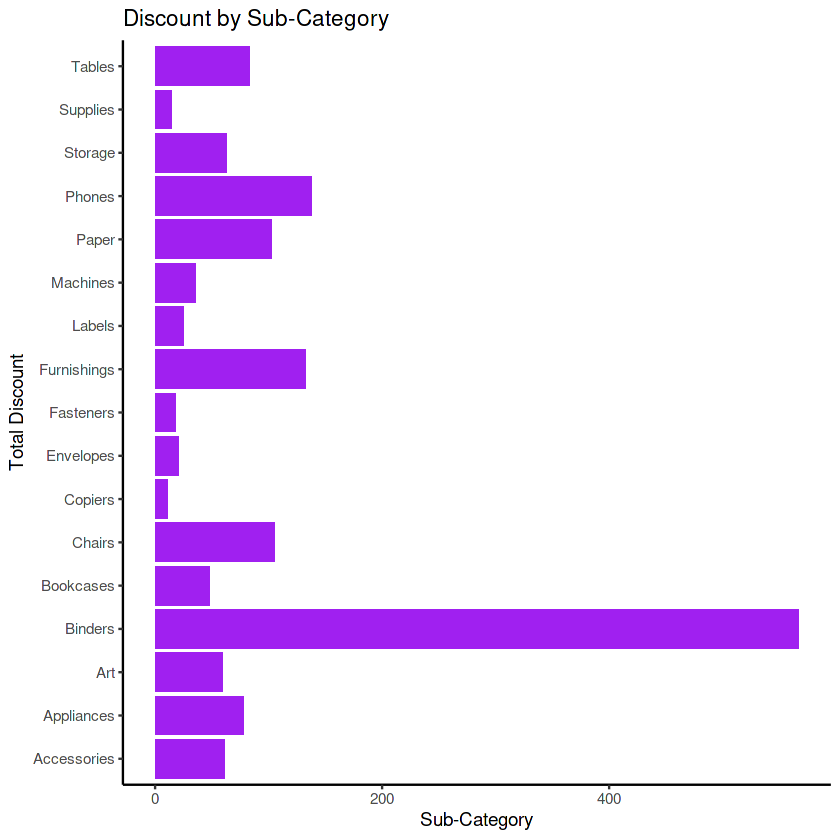

In [13]:
#using ggplot2 to visualize the bar graph
# For Category
store_data %>% group_by(category) %>% summarise(discount=sum(discount)) %>% 
ggplot() + geom_col(mapping=aes(x=category,y=discount), fill="orange") + theme_classic() +
labs(title="Discount by Category", x="Category", y="Total Discount")
#using ggplot2 to visualize the bar graph
# For Sub-Category
store_data %>% group_by(sub_category) %>% summarise(discount=sum(discount)) %>% 
ggplot() + geom_col(mapping=aes(y=sub_category,x=discount), fill="purple") + theme_classic() +
labs(title="Discount by Sub-Category", x="Sub-Category", y="Total Discount")

> #### Office supplies has given most discount and Technology has the least discounts on sales.
> #### Binders has been given most discount and copiers least in sub-category.

**Q10. Most profit and loss by Category and Sub-Category?**

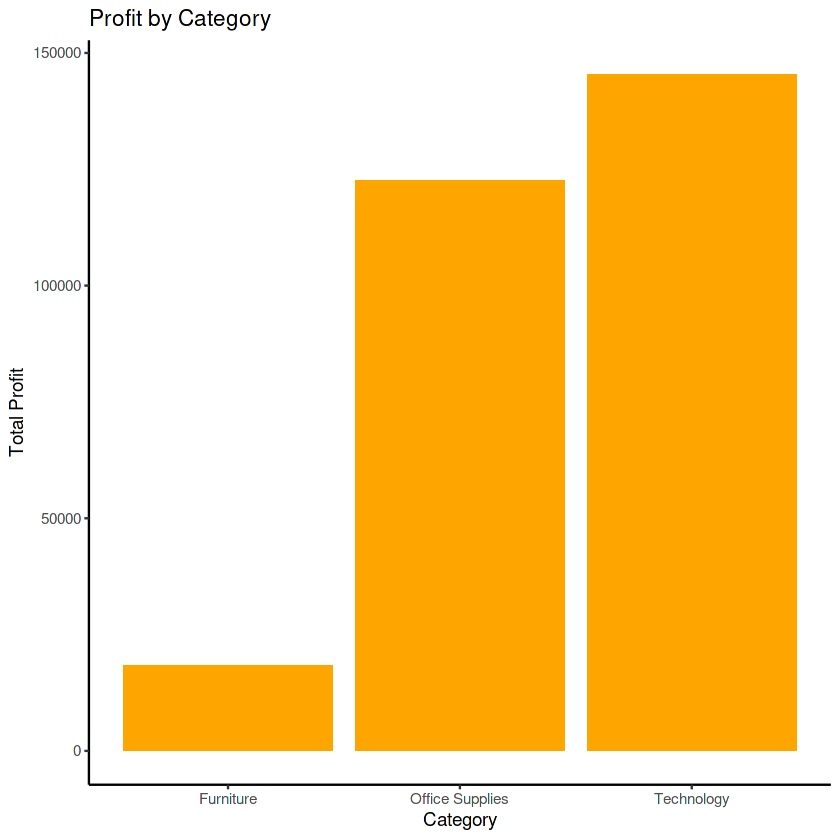

In [14]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(category) %>% summarise(profit=sum(profit)) %>% 
ggplot() + geom_col(mapping=aes(x=category,y=profit), fill="orange") + theme_classic() +
labs(title="Profit by Category", x="Category", y="Total Profit")

> #### Most profit is coming from Technogy category which is ovious because technology products have most profit per product.

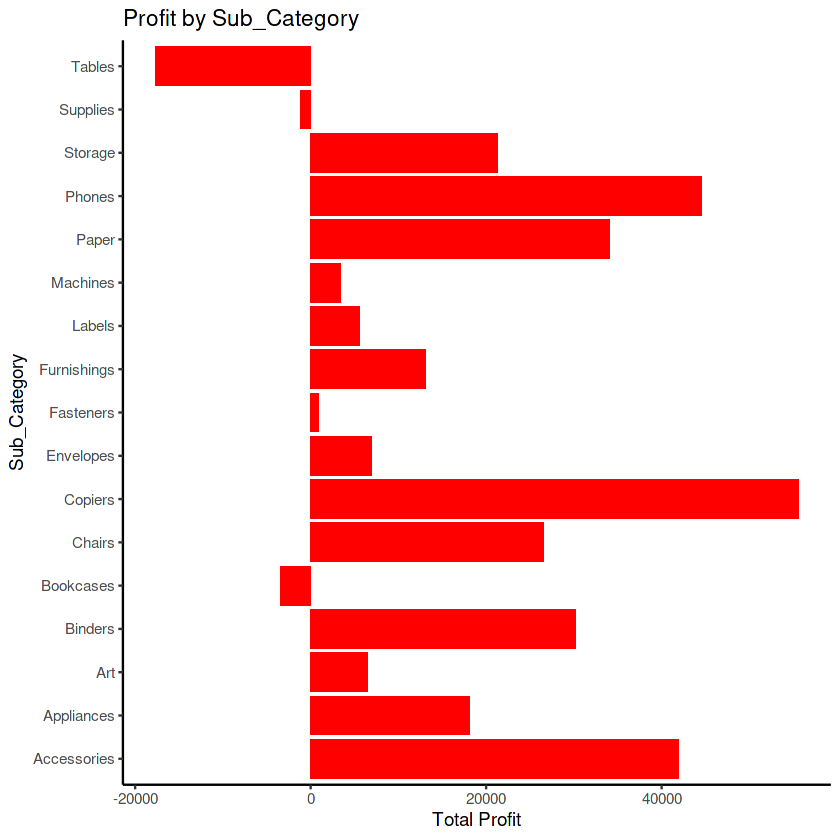

In [15]:
#using ggplot2 to visualize the bar graph
store_data %>% group_by(sub_category) %>% summarise(profit=sum(profit)) %>% 
ggplot() + geom_col(mapping=aes(y=sub_category,x=profit), fill="Red") + theme_classic() +
labs(title="Profit by Sub_Category", y="Sub_Category", x="Total Profit")

> #### Copiers have the most profit and Tables being the most loss making products.

 # Conclusions

### By exploration and analysis of data, here are some of the conclutions:
> #### 1. There are 4 types of ship modes and 3 segments.
> #### 2. California and newyork are top states with most profit.
> #### 3. Orgeon and Florida are top states with most Losses.
> #### 4. Newyork city has the most profit.
> #### 5. Philadelphia has the most losses.
> #### 6. There are 4 types of regions and West has most profit in all.
> #### 7. Technology has the most sales.
> #### 9. Office supplies has given most discount and Technology has the least discounts on sales.
> #### 10. Binders has been given most discount and copiers least in sub-category.
> #### 11. Most profit is coming from Technogy category which is ovious because technology products have              most profit per product.
> #### 12. Copiers have the most profit and Tables being the most loss making products.

# Recommendation

* #### Top losses are coming from Oregeon and Florida states. There is a need for to focus more on such states for controlling losses.
* #### Pliladelphia and Houston cities have the most losses and there sholud be increased focus on such cities. (For detailed loss please see graph)
* #### Office supplies products have been given most discounts and there is a need to decrease it in rder to increase profits.
* #### Tables have the most loss making products. There should be increased focus on this area for better performance of business.